In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv("../data/gld_features.csv", index_col='Date', parse_dates=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume',
            'MA5', 'MA10', 'MA20', 'RSI', 'MACD', 'Signal', 'Return', 'Volatility']
X = df[features]
y = df['Target_UpDown']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Gabungkan kembali train set agar bisa diproses manual
train_df = X_train.copy()
train_df['Target'] = y_train

# === Oversampling manual ===
class_0 = train_df[train_df['Target'] == 0]
class_1 = train_df[train_df['Target'] == 1]

if len(class_0) > len(class_1):
    class_1_oversampled = class_1.sample(len(class_0), replace=True, random_state=42)
    balanced_train = pd.concat([class_0, class_1_oversampled])
else:
    class_0_oversampled = class_0.sample(len(class_1), replace=True, random_state=42)
    balanced_train = pd.concat([class_1, class_0_oversampled])

# Acak ulang data train
balanced_train = balanced_train.sample(frac=1, random_state=42)

# Pisahkan fitur & target
X_train_balanced = balanced_train.drop(columns='Target')
y_train_balanced = balanced_train['Target']

# === Train model ===
model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# === Prediksi dan evaluasi ===
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Akurasi (Oversampling Manual): {acc:.4f}")
print("\n📋 Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


✅ Akurasi (Oversampling Manual): 0.4330

📋 Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.43      0.95      0.59        42
           1       0.50      0.04      0.07        55

    accuracy                           0.43        97
   macro avg       0.47      0.49      0.33        97
weighted avg       0.47      0.43      0.30        97



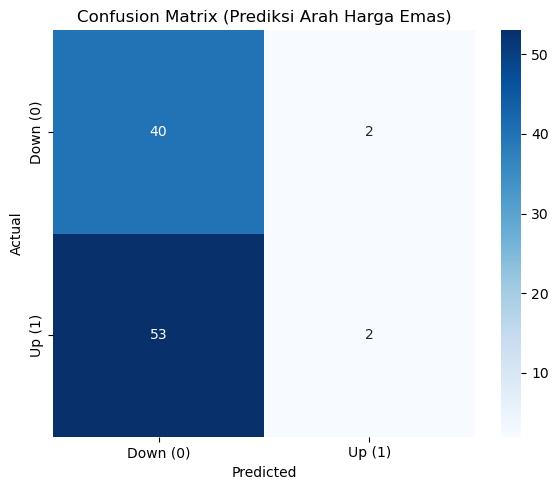

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Down (0)', 'Up (1)']

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Prediksi Arah Harga Emas)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
